# attempting keras + iPy

In [1]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def plot_model(history) :
    acc      = history.history['acc']
    val_acc  = history.history['val_acc']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [3]:
def train_model(x_train,y_train, x_val=None,y_val=None,
                do_val=0,
                hidden=[32,16],
                act='relu', opt='rmsprop',loss='mse',
                l2_reg_rate = 0.1,
                batch_size=512,
                epochs=10):
    model = models.Sequential()
    
    # fixed for IMDB
    input_size =10000
    output_size=1    

    for (indx,depth) in enumerate(hidden):
        if (indx==0):
            model.add(layers.Dense(depth, activation=act, input_shape=(input_size,),kernel_regularizer=regularizers.l2(l2_reg_rate)))
        else:
            model.add(layers.Dense(depth, activation=act,kernel_regularizer=regularizers.l2(l2_reg_rate)))
            
    # output layer
    model.add(layers.Dense(output_size, activation='sigmoid'))
    
    arch = [input_size, hidden, output_size]

    model.compile(optimizer=opt,
                  loss=loss,
                  metrics=['accuracy'])
    
    print ("Network INFO: ")
    print ("\tLayers:",arch)
    print ("\t Hyper: act=%s opt=%s loss=%s batch_size=%d l2_reg=%f" %(act,opt,loss,batch_size,l2_reg_rate));
    if (do_val):
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val,y_val))
        plot_model(history)
    else:
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

    print ("INFO: model evaluation .. ")
    results = model.evaluate(x_test, y_test)
    return results

# IMDB

In [47]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype ('float32')

# setup the validation & training data
# ensure there's no information leak!!
x_val   = x_train[:10000]
x_train = x_train[10000:]
y_val   = y_train[:10000]
y_train = y_train[10000:]

---
## re-train a new network

With regularization: 0.0
Network INFO: 
	Layers: [10000, [1024, 1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.000000
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 38s 3ms/step - loss: 0.1876 - acc: 0.7231 - val_loss: 0.0962 - val_acc: 0.8637
Epoch 2/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.0704 - acc: 0.9056 - val_loss: 0.0925 - val_acc: 0.8682
Epoch 3/10
15000/15000 [==============================] - 35s 2ms/step - loss: 0.0294 - acc: 0.9638 - val_loss: 0.0917 - val_acc: 0.8818
Epoch 4/10
15000/15000 [==============================] - 31s 2ms/step - loss: 0.0191 - acc: 0.9779 - val_loss: 0.0873 - val_acc: 0.8886
Epoch 5/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.0025 - acc: 0.9974 - val_loss: 0.0905 - val_acc: 0.8892
Epoch 6/10
15000/15000 [==============================] - 28s 2ms/step - loss: 0.0201 - acc: 0.9785 - val_loss: 0.0

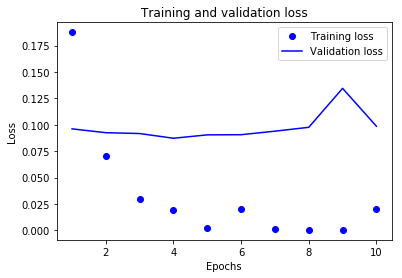

INFO: model evaluation .. 
25000/25000 [==============================] - 27s 1ms/step


[0.10507917699829675, 0.87883999999999995]

In [5]:
set_l2_reg = 0.
print ("With regularization:",set_l2_reg)
results = train_model(epochs=10,
                      hidden=[1024,1024,1024],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results

With regularization: 0.01
Network INFO: 
	Layers: [10000, [1024, 1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.010000
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 33s 2ms/step - loss: 9.4788 - acc: 0.5873 - val_loss: 1.6752 - val_acc: 0.5057
Epoch 2/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.6690 - acc: 0.7039 - val_loss: 0.2708 - val_acc: 0.8388
Epoch 3/10
15000/15000 [==============================] - 29s 2ms/step - loss: 0.2451 - acc: 0.7901 - val_loss: 0.2184 - val_acc: 0.8480
Epoch 4/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.2270 - acc: 0.8238 - val_loss: 0.2148 - val_acc: 0.8351
Epoch 5/10
15000/15000 [==============================] - 35s 2ms/step - loss: 0.2237 - acc: 0.8269 - val_loss: 0.2066 - val_acc: 0.8539
Epoch 6/10
15000/15000 [==============================] - 31s 2ms/step - loss: 0.2160 - acc: 0.8389 - val_loss: 0.

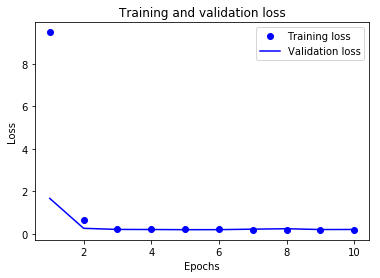

INFO: model evaluation .. 
25000/25000 [==============================] - 53s 2ms/step


[0.22040241268157959, 0.81432000000000004]

In [6]:
set_l2_reg = 0.01
print ("With regularization:",set_l2_reg)
results = train_model(epochs=10,
                      hidden=[1024,1024,1024],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results

With regularization: 0.001
Network INFO: 
	Layers: [10000, [1024, 1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.001000
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 35s 2ms/step - loss: 1.3527 - acc: 0.6823 - val_loss: 0.4506 - val_acc: 0.8177
Epoch 2/10
15000/15000 [==============================] - 31s 2ms/step - loss: 0.2674 - acc: 0.8588 - val_loss: 0.1646 - val_acc: 0.8759
Epoch 3/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.1484 - acc: 0.8817 - val_loss: 0.1557 - val_acc: 0.8567
Epoch 4/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.1295 - acc: 0.8927 - val_loss: 0.1430 - val_acc: 0.8672
Epoch 5/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.1165 - acc: 0.9053 - val_loss: 0.1274 - val_acc: 0.8822
Epoch 6/10
15000/15000 [==============================] - 31s 2ms/step - loss: 0.1112 - acc: 0.9109 - val_loss: 0

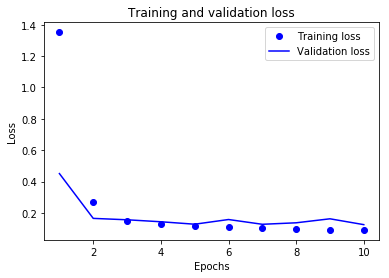

INFO: model evaluation .. 
25000/25000 [==============================] - 52s 2ms/step


[0.12835040962219238, 0.87568000000000001]

In [9]:
set_l2_reg = 0.001
print ("With regularization:",set_l2_reg)
results = train_model(epochs=10,
                      hidden=[1024,1024,1024],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results

With regularization: 0.0001
Network INFO: 
	Layers: [10000, [1024, 1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.000100
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 46s 3ms/step - loss: 0.3908 - acc: 0.7228 - val_loss: 0.1910 - val_acc: 0.8743
Epoch 2/10
15000/15000 [==============================] - 35s 2ms/step - loss: 0.1524 - acc: 0.8920 - val_loss: 0.1686 - val_acc: 0.8368
Epoch 3/10
15000/15000 [==============================] - 33s 2ms/step - loss: 0.0979 - acc: 0.9269 - val_loss: 0.1912 - val_acc: 0.7963
Epoch 4/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.0746 - acc: 0.9477 - val_loss: 0.1157 - val_acc: 0.8853
Epoch 5/10
15000/15000 [==============================] - 31s 2ms/step - loss: 0.0629 - acc: 0.9574 - val_loss: 0.1135 - val_acc: 0.8865
Epoch 6/10
15000/15000 [==============================] - 32s 2ms/step - loss: 0.0578 - acc: 0.9613 - val_loss: 

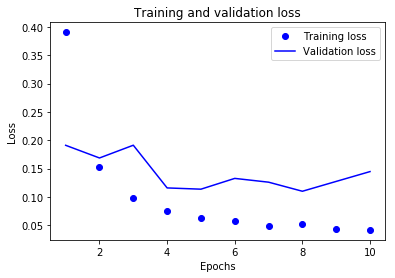

INFO: model evaluation .. 
25000/25000 [==============================] - 45s 2ms/step


[0.14997830868363379, 0.83176000000000005]

In [45]:
set_l2_reg = 0.0001
print ("With regularization:",set_l2_reg)
results = train_model(epochs=10,
                      hidden=[1024,1024,1024],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results

With regularization: 0
Network INFO: 
	Layers: [10000, [1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.000000
Train on 5000 samples, validate on 10000 samples
Epoch 1/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.3783 - acc: 0.5492 - val_loss: 0.2895 - val_acc: 0.5007
Epoch 2/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.1531 - acc: 0.7970 - val_loss: 0.3576 - val_acc: 0.5020
Epoch 3/10
5000/5000 [==============================] - 15s 3ms/step - loss: 0.0655 - acc: 0.9186 - val_loss: 0.3945 - val_acc: 0.5038
Epoch 4/10
5000/5000 [==============================] - 15s 3ms/step - loss: 0.0173 - acc: 0.9812 - val_loss: 0.4284 - val_acc: 0.5019
Epoch 5/10
5000/5000 [==============================] - 14s 3ms/step - loss: 0.0027 - acc: 0.9976 - val_loss: 0.4497 - val_acc: 0.4984
Epoch 6/10
5000/5000 [==============================] - 12s 2ms/step - loss: 8.9440e-04 - acc: 0.9994 - val_loss: 0.4521 - val_acc: 0.

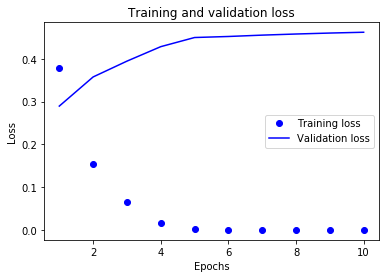

INFO: model evaluation .. 
25000/25000 [==============================] - 28s 1ms/step


[0.10748404756605626, 0.86468]

In [43]:
set_l2_reg = 0
print ("With regularization:",set_l2_reg)
results = train_model(epochs=10,
                      hidden=[1024,1024],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results

---

# Misc checks

## normalization

In [48]:
import numpy as np

# raw data
x = np.random.randn(10000,1)
mean_raw  = np.mean(x)
stdev_raw = np.std(x)
print ("raw mean =", mean_raw)
print ("raw stdev=",stdev_raw)

# normalize data
y = (x-mean_raw)/stdev_raw
mean_norm  = np.mean(y)
stdev_norm = np.std(y)
"""
easier way to do the above:
x -= x.mean(axis=0)
x /= x.std (axis=0)
"""

print ("nrm  mean=",mean_norm)
print ("nrm stdev=",stdev_norm)

# ensure normalized data has right distribution .. using the 'isclose' function
assert(np.isclose(mean_norm,  0.,atol=1e-16))
assert(np.isclose(stdev_norm, 1.,atol=1e-16))


raw mean = -0.014977703125
raw stdev= 1.00233905121
nrm  mean= 1.20792265079e-17
nrm stdev= 1.0


With regularization: 0.01
Network INFO: 
	Layers: [10000, [512, 512], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512 l2_reg=0.010000
Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 19s 1ms/step - loss: 3.8788 - acc: 0.6412 - val_loss: 1.1621 - val_acc: 0.6485
Epoch 2/5
15000/15000 [==============================] - 18s 1ms/step - loss: 0.6431 - acc: 0.7685 - val_loss: 0.3334 - val_acc: 0.7598
Epoch 3/5
15000/15000 [==============================] - 16s 1ms/step - loss: 0.2424 - acc: 0.8147 - val_loss: 0.1939 - val_acc: 0.8529
Epoch 4/5
15000/15000 [==============================] - 16s 1ms/step - loss: 0.1955 - acc: 0.8359 - val_loss: 0.1757 - val_acc: 0.8638
Epoch 5/5
15000/15000 [==============================] - 15s 975us/step - loss: 0.1958 - acc: 0.8295 - val_loss: 0.2130 - val_acc: 0.7914


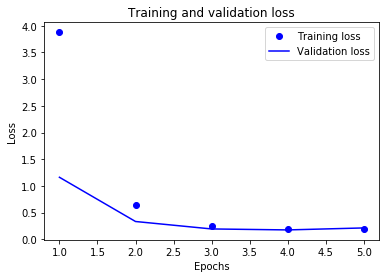

INFO: model evaluation .. 
25000/25000 [==============================] - 20s 789us/step


[0.21567055691242218, 0.78432000000000002]

In [46]:
set_l2_reg = 0.01
print ("With regularization:",set_l2_reg)
results = train_model(epochs=5,
                      hidden=[512,512],
                      x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1,
                      l2_reg_rate=set_l2_reg
                     )
results